- svm =
- svc =sv classifier
- svr = sv regressor

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
# import data

In [71]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [72]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [73]:
## split data

In [74]:
X=df.drop(columns='Class')
y=df['Class']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,train_size=.8,random_state=42)

In [77]:
from sklearn.svm import SVC

In [78]:
model_1=SVC()

In [79]:
model_1.fit(X_train,y_train)

SVC()

In [80]:
y_base=model_1.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score

In [82]:
cm_base=confusion_matrix(y_test,y_base,labels=[1,0])#labesl buat ngenuker buat ngebenerin posisi aktual dan pred

In [83]:
pd.DataFrame(data=cm_base,index=['akt 1','akt 0'],columns=['pred 1','pred 0'])

,pred 1,pred 0
akt 1,0,98
akt 0,0,56864


In [84]:
print(classification_report(y_test,y_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [85]:
df_base=pd.DataFrame(data=cm_base,index=['akt 1','akt 0'],columns=['pred 1','pred 0'])

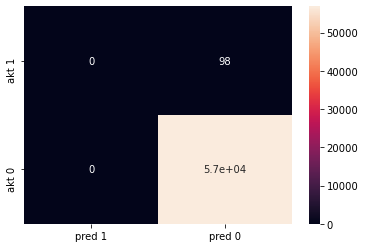

In [86]:
sns.heatmap(df_base,annot=True)
plt.show()

In [87]:
accuracy_score(y_test,y_base)

0.9982795547909132

In [88]:
recall_score(y_test,y_base)

0.0

## optimize model

In [89]:
### feature engineering

In [90]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [91]:
std= StandardScaler()

In [93]:
X_train_scaled=std.fit_transform(X_train)

In [94]:
model_2=SVC(max_iter=200)

In [95]:
model_2.fit(X_train_scaled,y_train)

SVC(max_iter=200)

In [96]:
# data yang akan di predict harus melalui step yang sama dengan fit

In [97]:
X_test_scaled=std.fit_transform(X_test)

In [98]:
y_scale=model_2.predict(X_test_scaled)

In [99]:
cm_scale=confusion_matrix(y_test,y_scale,labels=[1,0])

In [100]:
pd.DataFrame(data=cm_scale,index=['akt 1','akt 0'],columns=['pred 1','pred 0'])

,pred 1,pred 0
akt 1,76,22
akt 0,5,56859


In [101]:
recall_score(y_test,y_scale)

0.7755102040816326

In [102]:
print(classification_report(y_test,y_scale))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [103]:
print(classification_report(y_test,y_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [104]:
rbs=RobustScaler()

In [105]:
X_train_rbs=rbs.fit_transform(X_train)
X_test_rbs=rbs.fit_transform(X_test)

In [106]:
model_3=SVC(max_iter=200)

In [107]:
model_3.fit(X_train_rbs,y_train)

SVC(max_iter=200)

In [108]:
y_rbs=model_3.predict(X_test_rbs)

In [109]:
cm_rbs=confusion_matrix(y_test,y_rbs,labels=[1,0])

In [110]:
pd.DataFrame(data=cm_rbs, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,74,24
Akt 0,5,56859


In [111]:
print(classification_report(y_test,y_rbs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [112]:
### hyper parameter tuning

In [113]:
tune_1=SVC(max_iter = 400)

In [114]:
param_svm={
    'C':[1,0.001,0.01,0.1,10,100,1000],
    'kernel':['rbf','linear'],
    'gamma':[1,0.001,0.01,0.1,10,100,1000]
}

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
model_tuned=GridSearchCV(estimator=tune_1,param_grid=param_svm,cv=3,n_jobs=-1,verbose=1,scoring='recall')

In [117]:
### fit data train

In [118]:
model_tuned.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed: 10.1min finished


GridSearchCV(cv=3, estimator=SVC(max_iter=400), n_jobs=-1,
             param_grid={'C': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']},
             scoring='recall', verbose=1)

In [119]:
model_tuned.best_score_

0.3529570514303339

In [120]:
model_tuned_1 = model_tuned.best_estimator_

In [121]:
y_tune_1 = model_tuned_1.predict(X_test)

In [122]:
cm_tune = confusion_matrix(y_test, y_tune_1, labels=[1, 0])

In [123]:
pd.DataFrame(data=cm_tune, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,40,58
Akt 0,13445,43419


In [124]:
print(classification_report(y_test, y_tune_1))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87     56864
           1       0.00      0.41      0.01        98

    accuracy                           0.76     56962
   macro avg       0.50      0.59      0.44     56962
weighted avg       1.00      0.76      0.86     56962



In [125]:
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [126]:
tuned_2 = GridSearchCV(estimator=tune_1, param_grid=param_svm, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

In [127]:
tuned_2.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:  9.7min finished


GridSearchCV(cv=3, estimator=SVC(max_iter=400), n_jobs=-1,
             param_grid={'C': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']},
             scoring='recall', verbose=1)

In [128]:
model_tuned_2 = tuned_2.best_estimator_

In [129]:
model_tuned_2.score(X_train_scaled, y_train)

0.9993943250894248

In [130]:
model_tuned_2.score(X_test, y_test)

0.9982795547909132

In [131]:
y_tuned_2 = model_tuned_2.predict(X_test_scaled)

In [132]:
cm_tune_2 = confusion_matrix(y_test, y_tuned_2, labels=[1, 0])

In [133]:
pd.DataFrame(data=cm_tune_2, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,80,18
Akt 0,23,56841


In [134]:
print(classification_report(y_test, y_tuned_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.82      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [135]:
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

